[View in Colaboratory](https://colab.research.google.com/github/proishan11/Deep-Learning/blob/master/mnist.ipynb)

In [28]:
#!pip install keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import numpy as np

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


# if not normalized loss high accuracy very low. More epochs required to 
# minimize loss
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)


# 28x28 matrix of normalized pixel values
print(x_train[0])


model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dense(10, activation=tf.nn.softmax))


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
             metrics=[
                 'accuracy'
             ])

model.fit(x_train, y_train, epochs=3)


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [29]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 1s 89us/step
0.09323214642303064 0.9717


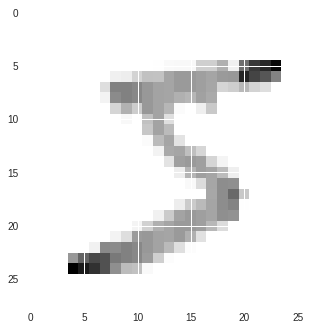

In [34]:
# !pip install matplotlib

import matplotlib.pyplot as plt

# print(x_train[0])

# cm stands for color map
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

In [0]:
# to save a model input_shape is necessary in first layer of network

model.save('mnist_num_model.model')

In [0]:
new_model = tf.keras.models.load_model('mnist_num_model.model')

predictions = new_model.predict([x_test])

7


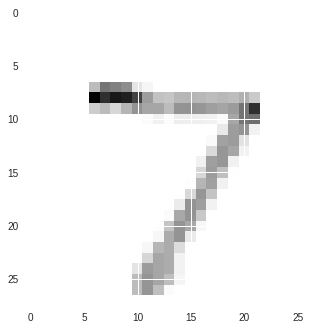

In [35]:
#print(predictions)

# predictions[0] is a one-hot array (10 dim) with probability distribution
# values

print(np.argmax(predictions[0]))

plt.imshow(x_test[0])
plt.show()